## Mandatory assignment
### FIE463: Numerical Methods in Macroeconomics and Finance using Python

### Task 1

In [45]:
import numpy as np

# Define parameters
beta = 0.9
gamma = 4.0
sigma = 0.16
mu = 0.04
w = 1.0
Rf = 1.0

# Define the shock realizations and probabilities as arrays
etas = np.array([-3**0.5, 0.0, 3**0.5])
probs = np.array([1/6, 2/3, 1/6])


In [46]:
# Gross risky return
returns = Rf + mu + sigma *etas

In [47]:
ER = probs @ returns  # expected return
ER2 = probs @ returns**2 # E[R^2]
varR = ER2 - ER**2  # var(R) = E[R^2] - (E[R])^2
stdR = np.sqrt(varR) # standard deviation
risk_premium = ER -Rf # excess return
sharpe = risk_premium / stdR # sharpe ratio

In [48]:
print(returns)

[0.76287187 1.04       1.31712813]


The computed risk premium (E[R] - Rf = 0.04) matches μ = 0.04 exactly, and the computed variance (Var(R) = 0.0256) matches σ² = 0.16² = 0.0256 exactly. This confirms that the three-state discretization of η perfectly reproduces the mean and variance of the underlying normal distribution.

### task 2

In [49]:
def util(c, gamma):
    """
    return the flow utility of consumption for a given risk aversion
    """

    u = -np.exp(-gamma*c)
    return u

Text(0, 0.5, 'utiloty u(c)')

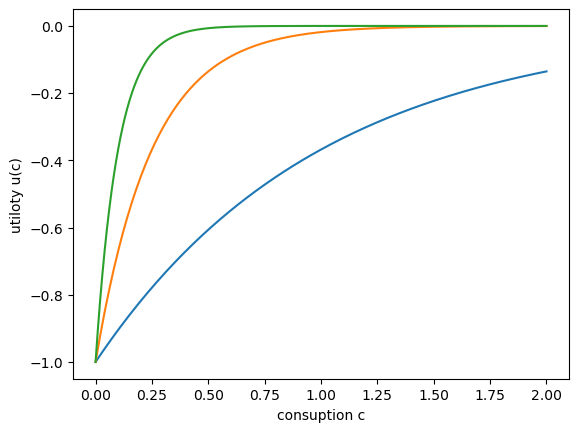

In [50]:
import matplotlib.pyplot as plt

c_grid = np.linspace(0,2,200)
gamma_values = [1,4,10]
util(c_grid, gamma)
plt.plot(c_grid, util(c_grid,1), label = 'y = 1')
plt.plot(c_grid, util(c_grid,4), label = 'y = 4')
plt.plot(c_grid, util(c_grid,10), label = 'y = 10')
plt.xlabel('consuption c')
plt.ylabel('utiloty u(c)')

### Task 4: Write a Python function expected_util()

In [54]:
def expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs):
    Rf = 1.0

    c1 = w - s
    R = Rf + mu + sigma * etas
    c2 = R * alpha * s + Rf * (1-alpha) * s

    u1 = util(c1, gamma)
    u2 = util(c2, gamma)

    Eu2 = probs @ u2
    U = u1 + beta * Eu2
    return U

expected_util(0.5, 0.5, beta, gamma, sigma, mu, w, etas, probs)
    

np.float64(-0.253868665109095)

### Task 5

In [57]:
def find_optimum(beta, gamma, sigma, mu, w, etas, probs):

    s_grid = np.linspace(1e-6, w - 1e-6, 1000)
    alpha_grid = np.linspace(0, 1, 1000)

    U_max = -np.inf
    s_opt = 0
    alpha_opt = 0

    for alpha in alpha_grid:
        utilities = []
        for s in s_grid:
            U = expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs)
            utilities.append(U)

        imax = np.argmax(utilities)
        if utilities[imax] > U_max:
            U_max = utilities[imax]
            s_opt = s_grid[imax]
            alpha_opt = alpha

    return s_opt, alpha_opt, U_max


### task 6

In [58]:
s_opt, alpha_opt, U_max = find_optimum(beta, gamma, sigma, mu, w, etas, probs)

print(f'optimal savings: s = {s_opt:.5f}')
print(f'optimal risky share: α = {alpha_opt:.5f} ')
print(f'maximized expected utility: U = {U_max:.5f}')


optimal savings: s = 0.48248
optimal risky share: α = 0.80981 
maximized expected utility: U = -0.25280


### task 7

In [59]:
gamma_grid = np.linspace(1, 10, 101)

alpha_opt_list = []

for g in gamma_grid:    
    s, alpha, U =find_optimum(beta, g, sigma, mu, w, etas, probs)
    alpha_opt_list.append(alpha)

plt.plot(gamma_grid, alpha_opt_list)
plt.xlabel('risky aversion y')
plt.ylabel('optimal risky share α')
plt.legend()



KeyboardInterrupt: 